# Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî Ïã§Ïäµ

## 1. ÌôòÍ≤Ω ÏÑ§Ï†ï

### 1.1 Î∂ÑÏÑúÏóê ÌïÑÏöîÌïú library Ìò∏Ï∂ú Î∞è google drive Ïó∞Í≤∞


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

### 2.1 Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÌôïÏù∏

In [111]:
df_org = pd.read_csv('/content/drive/MyDrive/data.csv',encoding='latin')
df_org.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [112]:
df_org.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/2011 12:50       0.85     12680.0  France  
541905  12/9/2011 12:50       2.10     12680.0  France  
541906  12/9/2011 12:50       4.15     12680.0  France  
541907  12/9/2011 12:50       4.15     12680.0  France  
541908  12/9/2011 12:50       4.95     12680.0  France

In [113]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [114]:
# ÏàòÏπòÌòï Ïª¨ÎüºÎßå Ï∂îÏ∂ú
numeric_cols = df_org.select_dtypes(include=['int64', 'float64']).columns

In [115]:
# Í∏∞Î≥∏ ÏöîÏïΩ ÌÜµÍ≥ÑÎüâ
df_org[numeric_cols].describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [116]:
# ÏôúÎèÑ (Skewness), Ï≤®ÎèÑ (Kurtosis), Î∂ÑÏÇ∞, Í≥†Ïú†Í∞í Ïàò, 0 Ïù¥Ìïò Í∞í Í∞úÏàò
additional_stats = pd.DataFrame({
    'skewness': df_org[numeric_cols].skew(),
    'kurtosis': df_org[numeric_cols].kurt(),
    'variance': df_org[numeric_cols].var(),
    'n_unique': df_org[numeric_cols].nunique(),
    'n_zeros': (df_org[numeric_cols] == 0).sum(),
    'n_negative': (df_org[numeric_cols] < 0).sum()
})

additional_stats

skewness       kurtosis      variance  n_unique  n_zeros  \
Quantity     -0.264076  119769.160031  4.755939e+04       722        0   
UnitPrice   186.506972   59005.719097  9.362469e+03      1630     2515   
CustomerID    0.029835      -1.179982  2.936426e+06      4372        0   

            n_negative  
Quantity         10624  
UnitPrice            2  
CustomerID           0

In [117]:
# Ïòà: Î°úÍ∑∏ Î≥ÄÌôò Ï†ÑÌõÑ ÎπÑÍµêÌï† Ïª¨Îüº (ÏñëÏàòÎßå Ìï¥Îãπ)
log_test_col = 'UnitPrice'
df_org['log_' + log_test_col] = np.log1p(df_org[log_test_col])  # log(1 + x)

# ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_org[log_test_col], kde=True)
plt.title(f'Original {log_test_col}')

plt.subplot(1, 2, 2)
sns.histplot(df_org["log_" + log_test_col], kde=True)
plt.title(f'Log-transformed {log_test_col}')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x78b326483ec0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x78b326481800> (for post_execute):


KeyboardInterrupt: 

In [118]:
stats_summary = df_org[numeric_cols].describe().T
stats_summary['skewness'] = df_org[numeric_cols].skew()
stats_summary['kurtosis'] = df_org[numeric_cols].kurt()
stats_summary['n_unique'] = df_org[numeric_cols].nunique()
stats_summary['n_zeros'] = (df_org[numeric_cols] == 0).sum()
stats_summary['n_negative'] = (df_org[numeric_cols] < 0).sum()
stats_summary

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max    skewness       kurtosis  n_unique  n_zeros  \
Quantity       10.00  80995.0   -0.264076  119769.160031       722        0   
UnitPrice       4.13  38970.0  186.506972   59005.719097      1630     2515   
CustomerID  16791.00  18287.0    0.029835      -1.179982      4372        0   

            n_negative  
Quantity         10624  
UnitPrice            2  
CustomerID           0

In [119]:
# ÏàòÏπòÌòï Ï†úÏô∏ ‚Üí object(Î¨∏Ïûê), category ÌÉÄÏûÖ Ï§ëÏã¨
cat_cols = df_org.select_dtypes(include=['object', 'category']).columns
cat_cols


Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [120]:
def categorical_summary(df, col, top_n=10):
    """Ìïú Î≤îÏ£ºÌòï Ïª¨ÎüºÏùò ÎπàÎèÑ¬∑ÎπÑÏú®¬∑ÎàÑÏ†ÅÎπÑÏú®¬∑ÏÉÅ¬∑ÌïòÏúÑ N Îì±ÏùÑ ÏöîÏïΩ"""

    vc = df[col].value_counts(dropna=False)
    total = vc.sum()
    summary = (
        vc.to_frame(name='Count')
          .assign(Percentage=lambda x: (x['Count'] / total * 100).round(2),
                  CumPct=lambda x: (x['Count'].cumsum() / total * 100).round(2))
    )

    # ÏÉÅ¬∑ÌïòÏúÑ N Ï∂îÏ∂ú
    top = summary.head(top_n)
    bottom = summary.tail(top_n)

    return summary, top, bottom

In [122]:
from IPython.display import display

country_summary, country_top, country_bottom = categorical_summary(df_org, 'Country', top_n=5)

print("üîπ Ï†ÑÏ≤¥ Country Î∂ÑÌè¨ ÏöîÏïΩ")
display(country_summary.head())        # ÏÉÅÏúÑ ÏùºÎ∂ÄÎßå ÌôïÏù∏

print("\nüîπ Top 5 Countries")
display(country_top)

print("\nüîπ Bottom 5 Countries")
display(country_bottom)

üîπ Ï†ÑÏ≤¥ Country Î∂ÑÌè¨ ÏöîÏïΩ


Count  Percentage  CumPct
Country                                   
United Kingdom  495478       91.43   91.43
Germany           9495        1.75   93.18
France            8557        1.58   94.76
EIRE              8196        1.51   96.28
Spain             2533        0.47   96.74


üîπ Top 5 Countries


Count  Percentage  CumPct
Country                                   
United Kingdom  495478       91.43   91.43
Germany           9495        1.75   93.18
France            8557        1.58   94.76
EIRE              8196        1.51   96.28
Spain             2533        0.47   96.74


üîπ Bottom 5 Countries


Count  Percentage  CumPct
Country                                  
Lithuania          35        0.01   99.98
Brazil             32        0.01   99.99
Czech Republic     30        0.01   99.99
Bahrain            19        0.00  100.00
Saudi Arabia       10        0.00  100.00

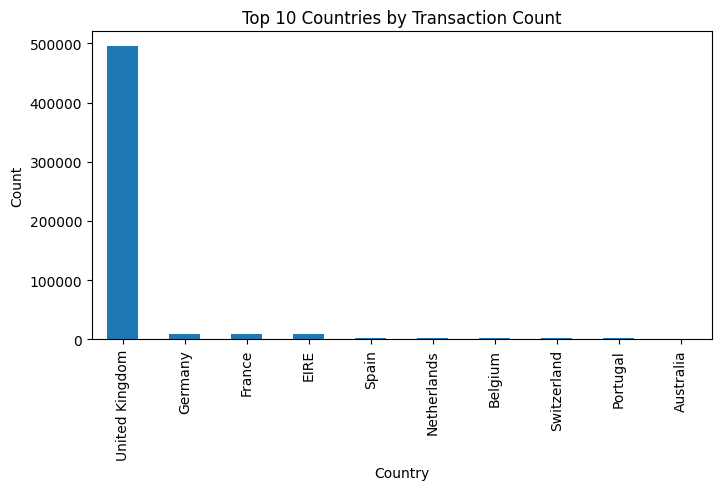

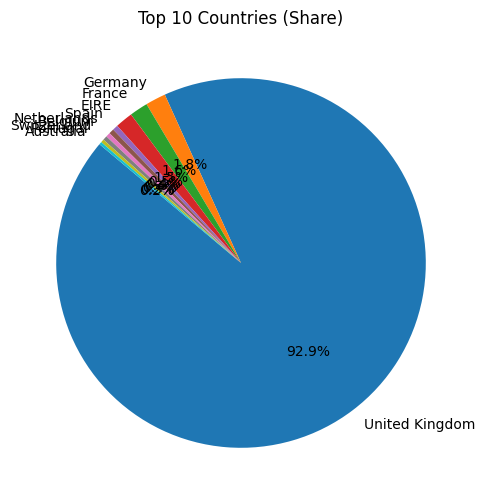

In [123]:
# ÏÉÅÏúÑ 10Í∞ú bar chart
country_top10 = country_summary.head(10)
country_top10['Count'].plot(kind='bar', figsize=(8,4), title='Top 10 Countries by Transaction Count')
plt.ylabel('Count'); plt.xlabel('Country'); plt.show()

# Ï†ÑÏ≤¥ pie (Íµ≠Í∞Ä ÏàòÍ∞Ä ÎßéÏúºÎ©¥ top‚ÄØNÎßå Ï∂îÏ≤ú)
plt.figure(figsize=(6,6))
country_top10['Count'].plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries (Share)'); plt.ylabel(''); plt.show()

Î∞òÌíà(Ï∑®ÏÜå) ÎπÑÏú®: 1.71%


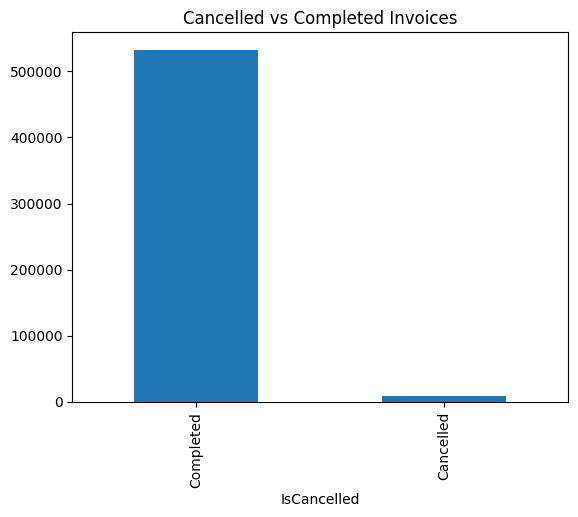

In [124]:
#InvoiceNo- Î∞òÌíà Ïó¨Î∂Ä ÌååÏïÖ
df_org['IsCancelled'] = df_org['InvoiceNo'].str.startswith('C')
cancel_rate = df_org['IsCancelled'].mean() * 100
print(f"Î∞òÌíà(Ï∑®ÏÜå) ÎπÑÏú®: {cancel_rate:.2f}%")

cancel_summary = df_org['IsCancelled'].value_counts().rename({True: 'Cancelled', False: 'Completed'})
cancel_summary.plot(kind='bar', title='Cancelled vs Completed Invoices')
plt.show()

In [ ]:
# TotalPrice Î®ºÏ†Ä Í≥ÑÏÇ∞
df_org['TotalPrice'] = df_org['Quantity'] * df_org['UnitPrice']

country_sales = (
    df_org.groupby('Country')['TotalPrice'].sum()
      .sort_values(ascending=False)
      .to_frame(name='Sales')
)

# ÎàÑÏ†Å Îß§Ï∂ú ÎπÑÏú®Î°ú ÌååÎ†àÌÜ†(ÏÉÅÏúÑ20%Í∞Ä Îß§Ï∂ú 80%?) ÌôïÏù∏
country_sales['CumPct'] = (country_sales['Sales'].cumsum() /
                           country_sales['Sales'].sum() * 100)

print(country_sales.head(10))          # ÏÉÅÏúÑ 10Í∞ú Îß§Ï∂ú


In [ ]:
df_org['InvoiceDate'] = pd.to_datetime(df_org['InvoiceDate'])
df_org['YearMonth'] = df_org['InvoiceDate'].dt.to_period('M')

country_monthly = (
    df_org.groupby(['YearMonth', 'Country'])['InvoiceNo']
      .nunique()
      .unstack(fill_value=0)
)

# ÏòÅÍµ≠(United Kingdom) ÏõîÎ≥Ñ Í±∞Îûò Ï∂îÏù¥
country_monthly['United Kingdom'].plot(figsize=(10,4),
                                       title='Monthly Transactions ‚Äì United Kingdom')
plt.ylabel('Number of Invoices'); plt.show()

In [ ]:
# Í±∞ÎûòÎüâ Í∏∞Ï§Ä ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä ÏÑ†Ï†ï
top_countries = df_org['Country'].value_counts().head(10).index

# ÏõîÎ≥Ñ Íµ≠Í∞ÄÎ≥Ñ Í±∞Îûò ÏàòÎüâ ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
country_monthly = (
    df_org[df_org['Country'].isin(top_countries)]
    .groupby(['YearMonth', 'Country'])['InvoiceNo']
    .nunique()
    .unstack(fill_value=0)
)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
for country in country_monthly.columns:
    plt.plot(country_monthly.index.to_timestamp(), country_monthly[country], label=country)

plt.title('Monthly Transactions by Country (Top 10)')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# figureÏôÄ 2Í∞úÏùò ÏÑúÎ∏åÌîåÎ°Ø (Í≥µÏú† xÏ∂ï)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# ÏÉÅÎã®: ÌÅ∞ Í∞íÎßå Î≥¥Ïó¨Ï§å (ex. United Kingdom Ï§ëÏã¨)
for country in country_monthly.columns:
    ax1.plot(country_monthly.index.to_timestamp(), country_monthly[country], label=country)

# ÌïòÎã®: ÏûëÏùÄ Í∞í ÏúÑÏ£ºÎ°ú ÌôïÎåÄ
for country in country_monthly.columns:
    ax2.plot(country_monthly.index.to_timestamp(), country_monthly[country], label=country)

# yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï (ÏúÑÎäî 1000 Ïù¥ÏÉÅÎßå, ÏïÑÎûòÎäî 0~200)
ax1.set_ylim(1000, country_monthly.max().max() + 200)
ax2.set_ylim(0, 200)

# yÏ∂ï Î¨ºÍ≤∞ ÌëúÏãú (break Ìö®Í≥º)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # xÏ∂ï ÏÉÅÎã® ÎùºÎ≤® Ï†úÍ±∞
ax2.xaxis.tick_bottom()

# Î¨ºÍ≤∞ÏÑ† Ìö®Í≥º Í∑∏Î¶¨Í∏∞
d = .015  # break ÌÅ¨Í∏∞
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # ÏôºÏ™Ω ÎåÄÍ∞ÅÏÑ†
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Ïò§Î•∏Ï™Ω ÎåÄÍ∞ÅÏÑ†

kwargs.update(transform=ax2.transAxes)  # ÌïòÎã® Ï∂ïÏúºÎ°ú Ï†ÑÌôò
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # ÏôºÏ™Ω ÎåÄÍ∞ÅÏÑ†
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Ïò§Î•∏Ï™Ω ÎåÄÍ∞ÅÏÑ†

# Í∏∞ÌÉÄ ÏÑ§Ï†ï
ax2.set_xlabel("Month")
ax1.set_ylabel("Invoices (High)")
ax2.set_ylabel("Invoices (Low)")
fig.suptitle("Monthly Transactions by Country (Broken Y-axis)")

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.3))
plt.tight_layout()
plt.show()

In [ ]:
# 1. Ï†ÑÏ≤òÎ¶¨: ÎÇ†Ïßú Î∞è Ï¥ù ÌåêÎß§Îüâ Í≥ÑÏÇ∞
df_org['InvoiceDate'] = pd.to_datetime(df_org['InvoiceDate'])
df_org['YearMonth'] = df_org['InvoiceDate'].dt.to_period('M')
df_org['TotalPrice'] = df_org['Quantity'] * df_org['UnitPrice']

# 2. ÏõîÎ≥Ñ Íµ≠Í∞ÄÎ≥Ñ Ï¥ù ÌåêÎß§Îüâ Í≥ÑÏÇ∞
monthly_sales_by_country = (
    df_org.groupby(['YearMonth', 'Country'])['TotalPrice']
      .sum()
      .unstack(fill_value=0)
)

# 3. Í±∞ÎûòÎüâ ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞ÄÎßå Ï∂îÏ∂ú
top10_countries_sales = df_org['Country'].value_counts().nlargest(10).index
monthly_sales_top10 = monthly_sales_by_country[top10_countries_sales]

# 4. broken y-axis ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# ÏÉÅÎã®: ÌÅ∞ Í∞í
for country in monthly_sales_top10.columns:
    ax1.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# ÌïòÎã®: ÏûëÏùÄ Í∞í
for country in monthly_sales_top10.columns:
    ax2.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
ax1.set_ylim(10000, monthly_sales_top10.max().max() + 5000)  # ÏÉÅÎã® Î≤îÏúÑ
ax2.set_ylim(0, 3000)  # ÌïòÎã® ÌôïÎåÄ Î≤îÏúÑ

# yÏ∂ï Î¨ºÍ≤∞
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015  # break ÌëúÏãú
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# ÎùºÎ≤® Î∞è Ï†úÎ™©
ax2.set_xlabel("Month")
ax1.set_ylabel("Total Sales (High)")
ax2.set_ylabel("Total Sales (Low)")
fig.suptitle("Monthly Total Sales by Country (Top 10, Broken Y-axis)")

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.3))
plt.tight_layout()
plt.show()

In [ ]:
df_clean = df_org[df_org['Quantity'] > 0].copy()
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Îã§Ïãú ÏõîÎ≥Ñ Ï¥ùÎß§Ï∂ú Í≥ÑÏÇ∞ (Î∞òÌíà Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales_by_country = (
    df_clean.groupby(['YearMonth', 'Country'])['TotalPrice']
            .sum()
            .unstack(fill_value=0)
)

# Í±∞Îûò ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä ÏÑ†ÌÉù
top10_countries = df_clean['Country'].value_counts().nlargest(10).index
monthly_sales_top10 = monthly_sales_by_country[top10_countries]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# ÏÉÅÎã® Î≤îÏúÑ (UK Îì± Í≥†Îß§Ï∂ú)
for country in monthly_sales_top10.columns:
    ax1.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# ÌïòÎã® Î≤îÏúÑ (ÎÇòÎ®∏ÏßÄ Íµ≠Í∞Ä ÌôïÎåÄ)
for country in monthly_sales_top10.columns:
    ax2.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†ï
ax1.set_ylim(500000, monthly_sales_top10.max().max() + 50000)
ax2.set_ylim(0, 30000)

# yÏ∂ï Îã®Ï†à ÌëúÌòÑ
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# ÎùºÎ≤®
ax2.set_xlabel("Month")
ax1.set_ylabel("Total Sales (High)")
ax2.set_ylabel("Total Sales (Low)")
fig.suptitle("Monthly Total Sales by Country (Top 10, Broken Y-axis)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.3))
plt.tight_layout()
plt.show()

In [ ]:
# IQR Í≥ÑÏÇ∞
Q1 = df_org['Quantity'].quantile(0.25)
Q3 = df_org['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Ïù¥ÏÉÅÏπò Í≤ΩÍ≥ÑÏÑ†
lower_bound = Q1 - 7 * IQR
upper_bound = Q3 + 7 * IQR

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_org['Quantity'])

# Í≤ΩÍ≥ÑÏÑ† ÌëúÏãú
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')


plt.xlim(lower_bound - 1000, upper_bound + 1000)

# ÎùºÎ≤®ÎßÅ
plt.title('Boxplot of Quantity with IQR Bounds')
plt.xlabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Quantity Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
quantity = df_org['Quantity']

# IQR Í∏∞Ï§Ä Í≤ΩÍ≥Ñ Íµ¨ÌïòÍ∏∞
Q1 = quantity.quantile(0.25)
Q3 = quantity.quantile(0.75)
IQR = Q3 - Q1

# Ïù¥ÏÉÅÏπò Î≤îÏúÑ ÏÑ§Ï†ï (ex: 1.5 IQR Î≤îÏúÑ ÎÇ¥Îßå ÏãúÍ∞ÅÌôî)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ïù¥ÏÉÅÏπò Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞Îßå ÏãúÍ∞ÅÌôî
filtered_quantity = quantity[(quantity >= -1000) & (quantity <= 1000)]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.displot(filtered_quantity, bins=100, kde=True, color='lightgray')
plt.axvline(Q1, color='red', linestyle='--', linewidth=2, label=f'Q1 ({Q1:.2f})')
plt.axvline(Q3, color='blue', linestyle='--', linewidth=2, label=f'Q3 ({Q3:.2f})')
plt.xlim(-200, 200)

# ÎùºÎ≤®ÎßÅ
plt.title('Filtered Quantity Distribution with Q1 and Q3')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Î≤îÏ£º Î≥Ñ Íµ¨Îß§ Îã§ÏñëÏÑ±
customer_variety = (
    df_org.groupby('CustomerID')['StockCode']
      .nunique()
      .to_frame(name='DistinctItems')
)

print(customer_variety['DistinctItems'].describe())

In [ ]:
# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Í∏∞Ï§ÄÎ≥Ñ ÎπÑÍµêÌëú
methods_comparison = pd.DataFrame({
    'Í∏∞Ï§Ä': ['Q1 - 1.5√óIQR, Q3 + 1.5√óIQR', 'z-score > 3 ÎòêÎäî < -3', 'ÏÉÅÏúÑ/ÌïòÏúÑ n%'],
    'Î∞©Î≤ï': ['IQR Î∞©Ïãù', 'Z-score Î∞©Ïãù', 'Percentile Î∞©Ïãù'],
    'Ïû•Ï†ê': ['ÎπÑÎ™®ÏàòÏ†Å, Î∂ÑÌè¨ Í∞ÄÏ†ï ÏóÜÏùå', 'Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ïÌïòÏóê Ìö®Í≥ºÏ†Å', 'Ïú†Ïó∞ÌïòÍ≤å ÎπÑÏú® ÏÑ§Ï†ï Í∞ÄÎä•'],
    'Îã®Ï†ê': ['Í∑πÎã®Í∞í ÎßéÏùÑ Í≤ΩÏö∞ ÎØºÍ∞ê', 'Ï†ïÍ∑úÎ∂ÑÌè¨ ÏïÑÎãê Í≤ΩÏö∞ Î∂ÄÏ†ÅÏ†à', 'Í∏∞Ï§Ä ÏÑ†ÌÉù Ï£ºÍ¥ÄÏ†Å']
})

methods_comparison

### 2.2 Îç∞Ïù¥ÌÑ∞ ÌòïÎ≥Ä

In [ ]:
# Î¨∏ÏûêÏó¥ Î≥ÄÏàòÎ•º datetime ÏúºÎ°ú Î≥ÄÌôò
# df_org['InvoiceDate'] = pd.DatetimeIndex(df_org['InvoiceDate'])
# df_org.info()

## 3.NULL Í∞í Ï≤òÎ¶¨
### 3.1 NULL Í∞í ÌôïÏù∏

In [ ]:
# Null Í∞íÏù¥ ÏûàÎäî Ï†ÑÏ≤¥ case Ïàò ÌôïÏù∏
df_org.isnull().sum().sum()

In [ ]:
# Null Í∞íÏùò ÎπÑÏú®
df_org.isnull().sum().sum() / df_org.shape[0]

In [ ]:
# Null Í∞íÏù¥ ÏûàÎäî Î≥ÄÏàò ÌôïÏù∏
df_org.isnull().sum()

### Question
- CustomerID Í∞Ä NullÏù∏ Í≤ΩÏö∞Í∞Ä Ï†ïÏÉÅÏùºÍπå?
- ÎßåÏïΩ Null Ïù∏ Í≤ΩÏö∞Í∞Ä Ï†ïÏÉÅÏù¥ÎùºÎ©¥ Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùÑÍπå?

In [ ]:
# CustomerID Í∞Ä Null Ïù∏ case  ÌôïÏù∏ÌïòÍ∏∞
df_org[df_org.CustomerID.isnull()]

### 3.2 NULL Í∞í Ï≤òÎ¶¨ (ÏÇ≠Ï†ú) Î∞è ÌôïÏù∏

In [ ]:
df_na_treat =  df_org.dropna(axis = 0)

In [ ]:
# Country ÎπÑÏú® ÏöîÏïΩ (df_na_treat Í∏∞Ï§Ä)
country_counts = df_na_treat['Country'].value_counts(normalize=True) * 100
top_countries = country_counts[country_counts >= 2]
others = country_counts[country_counts < 2].sum()

# Í∏∞ÌÉÄ Ìè¨Ìï® ÏãúÎ¶¨Ï¶àÎ°ú Ïû¨Íµ¨ÏÑ±
country_summary = top_countries.copy()
country_summary['Others'] = others

# ÌååÏù¥ Ï∞®Ìä∏
plt.figure(figsize=(8, 8))
plt.pie(country_summary, labels=country_summary.index, autopct='%1.1f%%', startangle=140)
plt.title('Country Distribution', fontsize = 18)
plt.axis('equal')
plt.show()

In [ ]:
# ÏÉÅÏúÑ 5Í∞ú + Í∏∞ÌÉÄ Ï≤òÎ¶¨
country_counts = df_na_treat['Country'].value_counts()
total = country_counts.sum()

# ÎπÑÏú®Í≥º ÎàÑÏ†Å ÎπÑÏú® Í≥ÑÏÇ∞
country_df = pd.DataFrame({
    'Country': country_counts.index,
    'Count': country_counts.values,
})
country_df['Percentage'] = (country_df['Count'] / total) * 100
country_df['CumPct'] = country_df['Percentage'].cumsum()

# ÏÉÅÏúÑ 5Í∞ú + Í∏∞ÌÉÄ
top_5 = country_df.iloc[:5].copy()
others = country_df.iloc[5:].copy()

# 'Í∏∞ÌÉÄ' Î¨∂Í∏∞
others_sum = pd.Series({
    'Country': 'Others',
    'Count': others['Count'].sum(),
    'Percentage': others['Percentage'].sum()
})
top_5 = pd.concat([top_5, others_sum.to_frame().T], ignore_index=True)
top_5['CumPct'] = top_5['Percentage'].cumsum()

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', data=top_5, palette='pastel')

# Í∞í ÌëúÏãú
for index, row in top_5.iterrows():
    plt.text(index, row['Count'] + total * 0.005, f"{row['Percentage']:.1f}%", ha='center', fontsize=10)

plt.title('Top 5 Countries + Others by Transaction Count', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
country_counts = df_na_treat['Country'].value_counts()
total = country_counts.sum()

# ÎπÑÏú® Î∞è ÎàÑÏ†Å ÎπÑÏú® Í≥ÑÏÇ∞
country_summary = pd.DataFrame({
    'Country': country_counts.index,
    'Count': country_counts.values
})
country_summary['Percentage'] = (country_summary['Count'] / total * 100).round(2)
country_summary['CumPct'] = country_summary['Percentage'].cumsum().round(2)

# ÏÉÅÏúÑ 5Í∞ú Íµ≠Í∞ÄÎßå Ï∂úÎ†•
top5_country_summary = country_summary.head(5).reset_index(drop=True)
import IPython.display as display
display.display(top5_country_summary)

In [ ]:
df_na_treat.isnull().sum().sum()

In [ ]:
df_na_treat.shape

## 4. Îç∞Ïù¥ÌÑ∞ÌÉêÏÉâ Î∞è Ïù¥ÏÉÅÏπò Ï†úÍ±∞

### 4.1 Ïù¥ÏÉÅÏπò ÌôïÏù∏

In [ ]:
df_na_treat.describe()

In [ ]:
# Ïù¥ÏÉÅÏπò ÏºÄÏù¥Ïä§ ÌôïÏù∏
df_na_treat[(df_na_treat.Quantity == -80995) | (df_na_treat.Quantity == 80995) ]

In [ ]:
# Quantity Ïù¥ÏÉÅÏπò case ÌôïÏù∏
df_na_treat[df_na_treat.Quantity <= 0 ].count()

In [ ]:
# ÏùåÏàòÍ∞íÏúºÎ°ú ÏãúÏûëÌïòÎäî caseÎäî InvocieNo Í∞Ä 'C' Î°ú ÏãúÏûë ÌïòÎäî Í≤ΩÏö∞ÏôÄ case Í∞Ä ÎèôÏùºÌï®
df_na_treat['InvoiceNo'].str.startswith("C").value_counts()

In [ ]:
df_na_treat[(df_na_treat.Quantity <= 0) & (df_na_treat.InvoiceNo.str.startswith("C"))].shape

In [ ]:
# UnitPirce Í∞Ä Í∞ÄÏû• ÌÅ∞ Í∞íÎèÑ ÌôòÎ∂à case ÏûÑ
df_na_treat[df_na_treat.UnitPrice == 38970]

In [ ]:
df_na_treat[df_na_treat.UnitPrice == 0].head(10)

### 4.2 EDA


In [ ]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò ÎåÄÎûµÏ†ÅÏù∏ Î∂ÑÌè¨ ÌôïÏù∏

df_na_treat.describe()

# ÌôïÏù∏ ÌïÑÏöîÌïú Î∂ÄÎ∂Ñ
## 1. Quantity ÏùåÏàòÏôÄ Îß§Ïö∞ ÌÅ∞ÏàòÍ∞Ä ÏûàÎã§.
## 2. Í∞ÄÍ≤©Ïùò max Í∞íÏù¥ ÎÑàÎ¨¥ ÌÅ¨Îã§ Ïù¥ÏÉÅÏπòÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.


### Quantity

In [ ]:
sns.boxplot(df_na_treat['Quantity'])
plt.xlim(-10,200)
plt.show()

In [ ]:
df_na_treat['Quantity'].quantile(q=0.99,  interpolation='nearest')

In [ ]:
sns.histplot(df_na_treat['Quantity'], bins = 10000, kde= False) #kde=True Ïù¥Î©¥ Ïª§ÎÑê Î∞ÄÎèÑÎèÑ Ìï®Íªò Í∑∏Î¶º
plt.xlim(-10,150)
plt.show()

#### UnitPrice

In [ ]:
sns.boxplot(df_na_treat['UnitPrice'])

In [ ]:
sns.boxplot(df_na_treat['UnitPrice'])
plt.xlim(-10,100)

In [ ]:
sns.histplot(df_na_treat['UnitPrice'], kde = False, bins =10000)
plt.xlim(0,500)
plt.show()

In [ ]:
#  Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ case ÌôïÏù∏
df_na_treat[df_na_treat.UnitPrice >= 1000]

In [ ]:
# Í∞íÏù¥ 1000 Ïù¥ÏÉÅÏù∏ case Í∞ØÏàò ÌôïÏù∏
df_na_treat[df_na_treat.UnitPrice >= 1000].shape

#### InvoiceDate

In [ ]:
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).min())
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).max())
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('D').value_counts().head(20))


In [ ]:
pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('M').value_counts()

In [ ]:
df_na_treat['Country'].value_counts()
# df_na_treat['Country'].value_counts().sum()

#### InvoiceDate

In [ ]:
df_na_treat

In [ ]:
df_na_treat.groupby(['StockCode','Description']).size().sort_values(ascending=False).head(10)

In [ ]:
df_na_treat.duplicated().sum()

## 4.3 Îç∞Ïù¥ÌÑ∞ cleansing
 1. ÌôòÎ∂à Ï†úÍ±∞
 2. Î¨¥Î£åÍµ¨Îß§Ïù∏Í±¥ Ï†úÍ±∞  
 3. CustomerId NULL Ï†úÍ±∞
 4. Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†ú

In [128]:
df_outlier_treat = df_na_treat[(df_na_treat.Quantity > 0) & (df_na_treat.UnitPrice != 0) & (~df_na_treat.CustomerID.isnull()) ]
df_outlier_treat = df_outlier_treat[~df_outlier_treat.duplicated()]
# log(UnitPrice) Í≥ÑÏÇ∞Ìï¥ÏÑú 0~4 ÏÇ¨Ïù¥Îßå Ïú†ÏßÄ
log_unit = np.log(df_outlier_treat['UnitPrice'])
df_outlier_treat = df_outlier_treat[(log_unit >= 0) & (log_unit <= 4)]

df_outlier_treat.shape

(300782, 12)

## 4.4 Ïú†Ï†ÄÎã®ÏúÑ Ïä§ÏΩîÏñ¥ÎßÅÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩ
1. Íµ¨Îß§ Í±¥Ïàò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ CustomerId, InvoiceNo Î≥ÑÎ°ú ÏöîÏïΩ

---



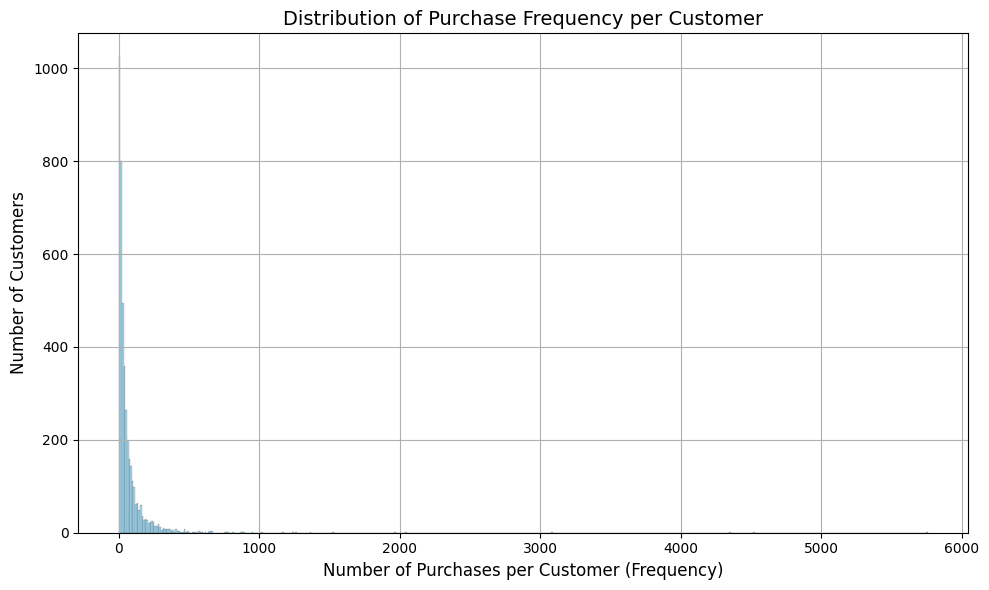

In [129]:
# df_na_treat.groupby(['StockCode','Description']).size().sort_values(ascending=False).head(10)

# temp_frequecy = df_outlier_treat.groupby(['CustomerID']).InvoiceNo.nunique()
# Í≥†Í∞ùÎ≥Ñ Íµ¨Îß§ ÎπàÎèÑ Í≥ÑÏÇ∞
temp_frequency = df_outlier_treat.groupby('CustomerID').size()

# ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.histplot(temp_frequency, bins=500, kde=False, color='skyblue')

# ÎùºÎ≤® Î∞è Ï†úÎ™© ÏÑ§Ï†ï
plt.xlabel('Number of Purchases per Customer (Frequency)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Distribution of Purchase Frequency per Customer', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [130]:
#
temp_frequecy.to_frame()
df_frequecy = temp_frequecy.reset_index().rename(columns = {'index' :'CustomerID'})
df_frequecy.columns = ['CustomerID','frequecy']
df_frequecy

CustomerID  frequecy
0        12346.0         1
1        12347.0       139
2        12348.0        11
3        12349.0        63
4        12350.0        14
...          ...       ...
4290     18280.0        10
4291     18281.0         4
4292     18282.0         9
4293     18283.0       495
4294     18287.0        46

[4295 rows x 2 columns]

2. Ïú†Ï†ÄÎ≥Ñ Íµ¨Îß§Í∏àÏï° ÏÉùÏÑ±


/tmp/ipython-input-131-2052679913.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_monitery)


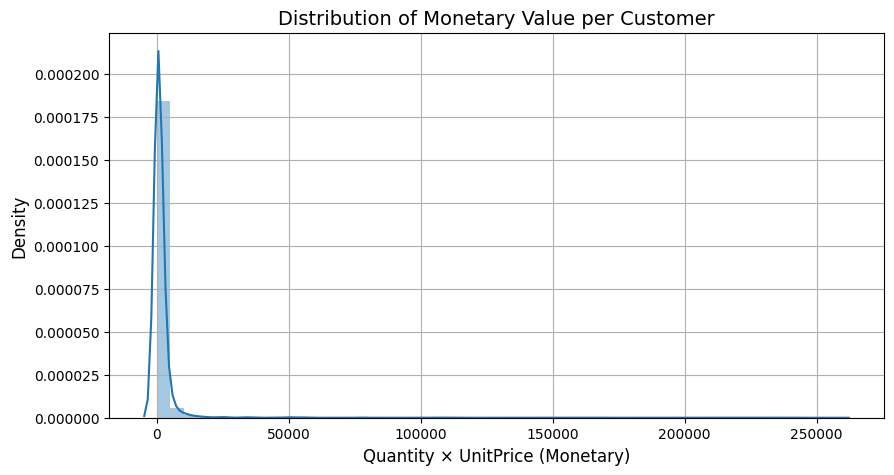

In [131]:
temp = df_outlier_treat[['CustomerID', 'Quantity', 'UnitPrice']].copy()
temp['monitery'] = temp['Quantity'] * temp['UnitPrice']
temp_monitery = temp.groupby(['CustomerID']).monitery.sum()

plt.figure(figsize=(10, 5))
sns.distplot(temp_monitery)

plt.title("Distribution of Monetary Value per Customer", fontsize=14)
plt.xlabel("Quantity √ó UnitPrice (Monetary)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True)
plt.show()

In [132]:
df_monitery = temp_monitery.to_frame()
df_monitery = df_monitery.reset_index().rename(columns = {'index' :'CustomerID'})
df_monitery

CustomerID  monitery
0        12346.0  77183.60
1        12347.0   3764.48
2        12348.0   1114.00
3        12349.0   1368.75
4        12350.0    295.30
...          ...       ...
4290     18280.0    180.60
4291     18281.0     65.70
4292     18282.0    152.45
4293     18283.0   1714.85
4294     18287.0   1514.08

[4295 rows x 2 columns]

3.Ïú†Ï†ÄÎ≥Ñ ÏµúÍ∑º Í±∞Îûò ÏÉùÏÑ±
 - Ïò§ÎäòÏùÑ 2011-12-10Ïùº Î°ú Í∞ÄÏ†ï  

In [133]:
# pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('D') -""
temp2 = df_outlier_treat[['CustomerID','InvoiceDate']].copy()
temp2['today'] ="2011-12-10"

temp2['diff_days'] = (pd.to_datetime(temp2['today']) - pd.to_datetime(temp2['InvoiceDate'])).dt.days
recency = temp2.groupby('CustomerID').diff_days.min()
recency

CustomerID
12346.0    325
12347.0      2
12348.0     75
12349.0     18
12350.0    310
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: diff_days, Length: 4295, dtype: int64

In [134]:
df_recency = recency.to_frame()
df_recency = df_recency.reset_index().rename(columns = {'index' :'CustomerID', 'diff_days' :'recency'})
df_recency

CustomerID  recency
0        12346.0      325
1        12347.0        2
2        12348.0       75
3        12349.0       18
4        12350.0      310
...          ...      ...
4290     18280.0      277
4291     18281.0      180
4292     18282.0        7
4293     18283.0        3
4294     18287.0       42

[4295 rows x 2 columns]

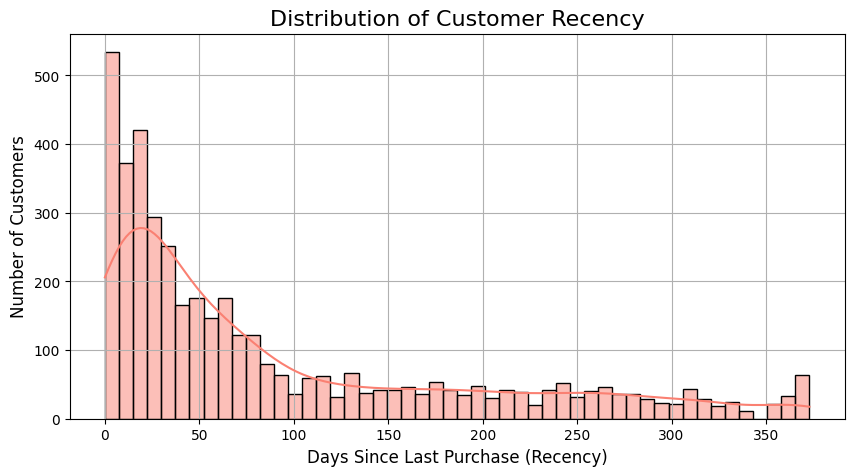

In [135]:
plt.figure(figsize=(10, 5))
sns.histplot(df_recency['recency'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Customer Recency', fontsize=16)
plt.xlabel('Days Since Last Purchase (Recency)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True)
plt.show()

In [136]:
rfm = pd.merge(df_frequecy, df_recency, how = 'inner', on ='CustomerID')


In [137]:
RFM_data = pd.merge(rfm, df_monitery, how ='inner', on= 'CustomerID')
RFM_data

CustomerID  frequecy  recency  monitery
0        12346.0         1      325  77183.60
1        12347.0       139        2   3764.48
2        12348.0        11       75   1114.00
3        12349.0        63       18   1368.75
4        12350.0        14      310    295.30
...          ...       ...      ...       ...
4290     18280.0        10      277    180.60
4291     18281.0         4      180     65.70
4292     18282.0         9        7    152.45
4293     18283.0       495        3   1714.85
4294     18287.0        46       42   1514.08

[4295 rows x 4 columns]

<Axes: xlabel='total_score'>

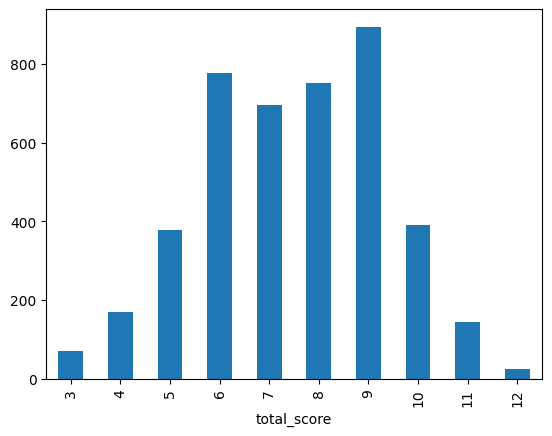

In [138]:
RFM_data['fre_score'] = pd.qcut(RFM_data['frequecy'],4, labels =[1,2,3,4])
RFM_data['rec_score'] = pd.qcut(RFM_data['recency'],4, labels =[1,2,3,4])
RFM_data['mon_score'] = pd.qcut(RFM_data['monitery'],4, labels =[1,2,3,4])
RFM_data['total_score'] = RFM_data['fre_score'].astype(int) + RFM_data['rec_score'].astype(int) + RFM_data['mon_score'].astype(int)
RFM_data['total_score'].value_counts().sort_index().plot(kind='bar')

In [139]:
RFM_data.head()

CustomerID  frequecy  recency  monitery fre_score rec_score mon_score  \
0     12346.0         1      325  77183.60         1         4         4   
1     12347.0       139        2   3764.48         4         1         4   
2     12348.0        11       75   1114.00         1         3         3   
3     12349.0        63       18   1368.75         3         2         3   
4     12350.0        14      310    295.30         2         4         2   

   total_score  
0            9  
1            9  
2            7  
3            8  
4            8

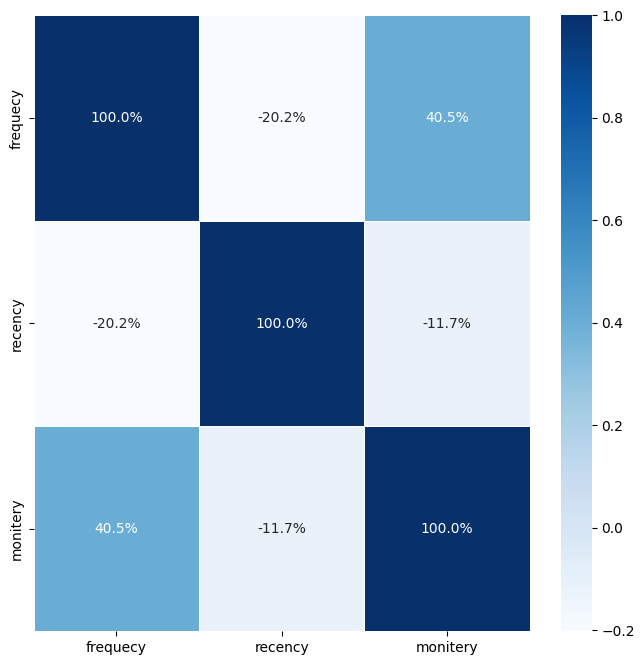

In [140]:
plt.figure(figsize =(8,8))
sns.heatmap(data = RFM_data[['frequecy','recency','monitery']].corr(),annot= True,
            fmt ='.1%', linewidths =.5, cmap='Blues')
plt.show()

In [141]:
df_count_pivot = RFM_data[['rec_score', 'mon_score']].value_counts(sort= False,normalize=True).sort_index().to_frame().unstack()
df_count_pivot

proportion                              
mon_score          1         2         3         4
rec_score                                         
1           0.024680  0.038882  0.065891  0.126193
2           0.048661  0.057276  0.073807  0.067520
3           0.059837  0.069150  0.074971  0.043073
4           0.116880  0.084750  0.035157  0.013271

<Axes: xlabel='None-mon_score', ylabel='rec_score'>

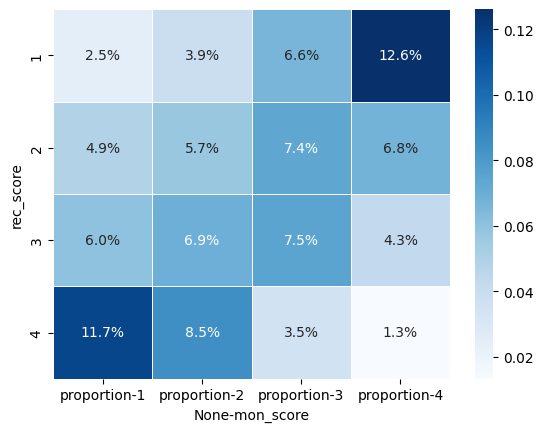

In [142]:
sns.heatmap(df_count_pivot, annot= True, fmt ='.1%', linewidths =.5, cmap='Blues')

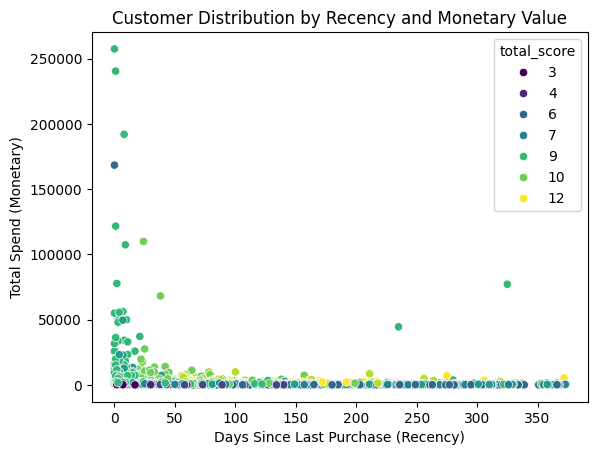

In [149]:
# Ïòà: 2D scatter plotÏúºÎ°ú Í≥†Í∞ù Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
sns.scatterplot(data=RFM_data, x='recency', y='monitery', hue='total_score', palette='viridis')
plt.title('Customer Distribution by Recency and Monetary Value')
plt.xlabel('Days Since Last Purchase (Recency)')
plt.ylabel('Total Spend (Monetary)')
plt.show()

In [143]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏù∏
df_org.shape

(541909, 10)

In [144]:
temp2 = df_outlier_treat[['CustomerID','Country']]
temp2.groupby(['CustomerID','Country']).count()
temp2

CustomerID         Country
0          17850.0  United Kingdom
1          17850.0  United Kingdom
2          17850.0  United Kingdom
3          17850.0  United Kingdom
4          17850.0  United Kingdom
...            ...             ...
541903     12680.0          France
541905     12680.0          France
541906     12680.0          France
541907     12680.0          France
541908     12680.0          France

[300782 rows x 2 columns]

In [145]:
RFM_data.CustomerID.nunique()

4295

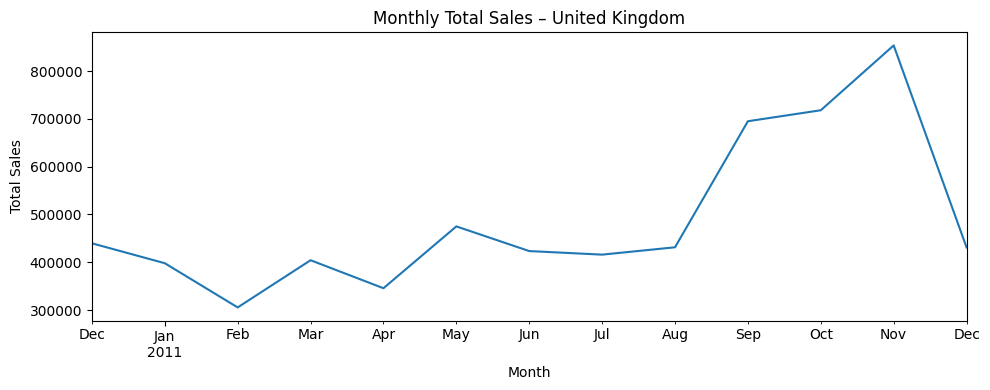

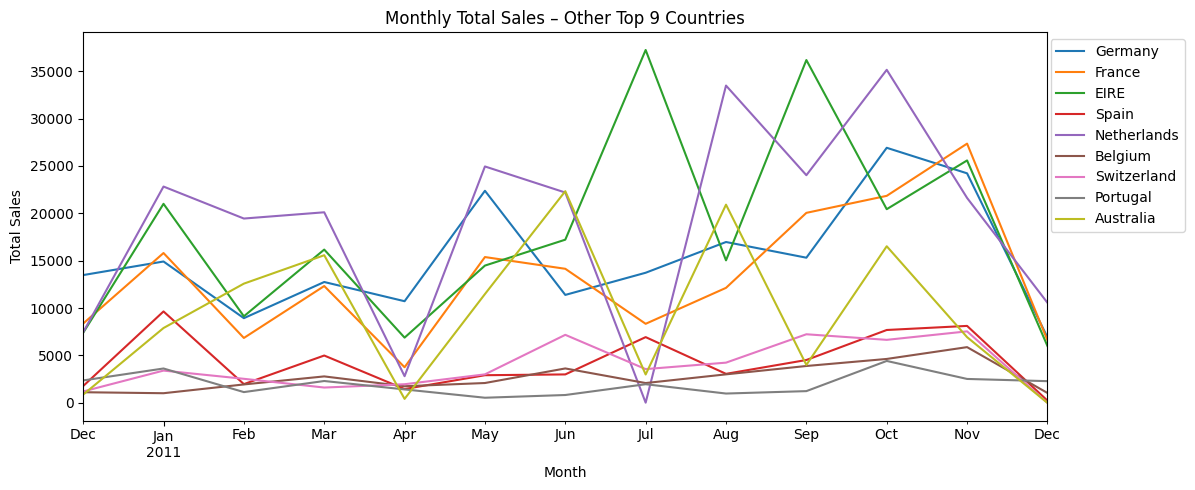

In [146]:
# ‚úÖ Ï†ÑÏ≤òÎ¶¨: Î∞òÌíà Ï†úÍ±∞ Î∞è TotalPrice Ïª¨Îüº ÏÉùÏÑ±
df_outlier_treat_clean = df_outlier_treat[df_outlier_treat['Quantity'] > 0].copy()
df_outlier_treat_clean['TotalPrice'] = df_outlier_treat_clean['Quantity'] * df_outlier_treat_clean['UnitPrice']

# ‚úÖ ÎÇ†Ïßú ÌÉÄÏûÖ Ï≤òÎ¶¨ Î∞è Ïõî Îã®ÏúÑÎ°ú Î≥ÄÌôò
df_outlier_treat_clean['InvoiceDate'] = pd.to_datetime(df_outlier_treat_clean['InvoiceDate'])
df_outlier_treat_clean['YearMonth'] = df_outlier_treat_clean['InvoiceDate'].dt.to_period('M')

# ‚úÖ ÏõîÎ≥Ñ Íµ≠Í∞ÄÎ≥Ñ Ï¥ùÎß§Ï∂ú
monthly_sales_by_country = (
    df_outlier_treat_clean.groupby(['YearMonth', 'Country'])['TotalPrice']
                     .sum()
                     .unstack(fill_value=0)
)

# ‚úÖ Í±∞ÎûòÎüâ Í∏∞Ï§Ä ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä ÏÑ†ÌÉù
top10_countries = df_outlier_treat_clean['Country'].value_counts().nlargest(10).index
monthly_sales_top10 = monthly_sales_by_country[top10_countries]

# ‚úÖ ÏòÅÍµ≠ (UK) Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 4))
monthly_sales_top10['United Kingdom'].plot()
plt.title('Monthly Total Sales ‚Äì United Kingdom')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# ‚úÖ ÎÇòÎ®∏ÏßÄ 9Í∞ú Íµ≠Í∞Ä Í∑∏ÎûòÌîÑ
other_9 = [c for c in top10_countries if c != 'United Kingdom']
monthly_sales_top10[other_9].plot(figsize=(12, 5))
plt.title('Monthly Total Sales ‚Äì Other Top 9 Countries')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [147]:
df_outlier_treat_clean.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  log_UnitPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       1.266948   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       1.479329   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       1.321756   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       1.479329   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       1.479329   

   IsCancelled  TotalPrice YearMonth  
0        False       15.30   2010-12  
1        False       20.34   2010-12  
2        False       22.00   2010-12  
3        False       20.34   2010-12  
4        False       20.34   2010-12

/tmp/ipython-input-148-248581981.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outlier_treat_clean[df_org['Country'].isin(top_countries)]


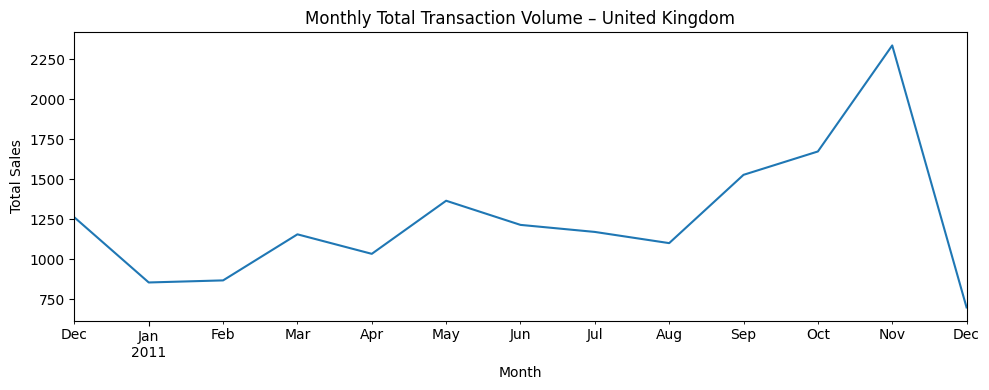

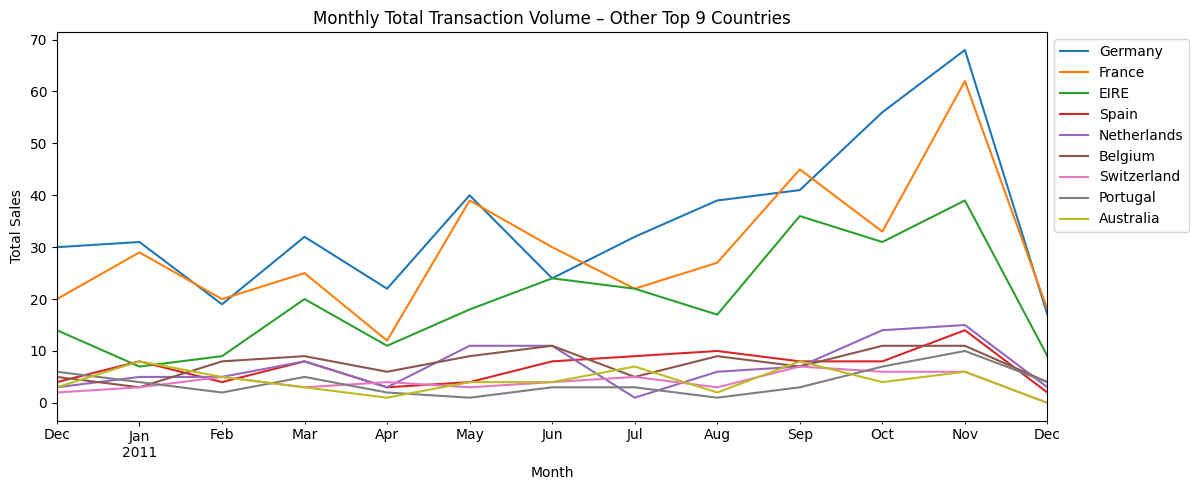

In [148]:
# Í±∞ÎûòÎüâ Í∏∞Ï§Ä ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä ÏÑ†Ï†ï
top_countries = df_outlier_treat_clean['Country'].value_counts().head(10).index

# ÏõîÎ≥Ñ Íµ≠Í∞ÄÎ≥Ñ Í±∞Îûò ÏàòÎüâ ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
country_monthly = (
    df_outlier_treat_clean[df_org['Country'].isin(top_countries)]
    .groupby(['YearMonth', 'Country'])['InvoiceNo']
    .nunique()
    .unstack(fill_value=0)
)
monthly_top10 = country_monthly[top_countries]

# ‚úÖ ÏòÅÍµ≠ (UK) Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 4))
monthly_top10['United Kingdom'].plot()
plt.title('Monthly Total Transaction Volume ‚Äì United Kingdom')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# ‚úÖ ÎÇòÎ®∏ÏßÄ 9Í∞ú Íµ≠Í∞Ä Í∑∏ÎûòÌîÑ
other_9 = [c for c in top_countries if c != 'United Kingdom']
monthly_top10[other_9].plot(figsize=(12, 5))
plt.title('Monthly Total Transaction Volume ‚Äì Other Top 9 Countries')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()